<a href="https://colab.research.google.com/github/tiutiutiu666/SC_Team-Assigment-Chapter-2-Machine-Learning-and-Deep-Learning/blob/main/Case%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

#mengelompokan data MaritalDesc dan Sex kemudian menghitung agregasi statistik pada kolom salary
salary_stats = (data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(
    min_salary = 'min',
    median_salary = 'median',
    max_salary = 'max',
    average_salary = 'mean'
    ).sort_index() #mengurutkan hasil berdasarkan index
)

# Display the results
salary_stats

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [ ]:
#Code here
termination_counts = data['TermReason'].value_counts()
top5_reasons = termination_counts.head().reset_index()
top5_reasons.columns = ['TermReason', 'total_termination']
top5_reasons.set_index('TermReason', inplace=True)

# Display the results
top5_reasons

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score? Hints: Use filter for Performance Score first. Don't forget to sort_values.
Expected Output as below
(10 Points)

In [ ]:
#Code Here
# Filter the data for employees with 'Exceeds' in the 'PerformanceScore' column
exceeds_data = data[data['PerformanceScore'] == 'Exceeds']

# Count the number of employees per 'RecruitmentSource'
recruitment_count = exceeds_data['RecruitmentSource'].value_counts().reset_index()

# Rename columns for clarity
recruitment_count.columns = ['RecruitmentSource', 'total_recruit']

# Sort values to get the desired output (highest number first)
recruitment_count = recruitment_count.sort_values(by='total_recruit', ascending=False)

#set 'RecqruitmentSource' as the index
recruitment_count.set_index('RecruitmentSource', inplace=True)

recruitment_count

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [ ]:
#Code Here
# Menghitung jumlah manajer unik di setiap departemen
managers_department = data.groupby('Department')['ManagerName'].nunique().reset_index()
# Rename columns for clarity
managers_department.columns = ['Department', 'ManagerName']
#set 'Department' as the index
managers_department.set_index('Department', inplace=True)

managers_department

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [4]:
#code here
termination = data.groupby('Sex')['Termd'].value_counts(normalize=True).rename('Termd')
print(termination)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

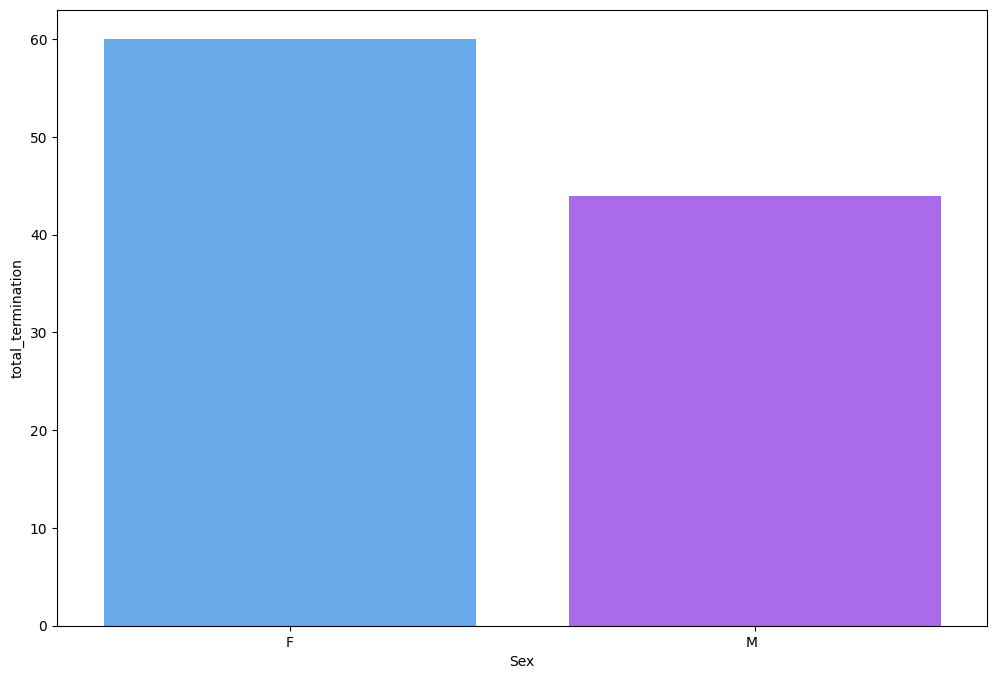

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)


Text(0, 0.5, 'Engagement Survey')

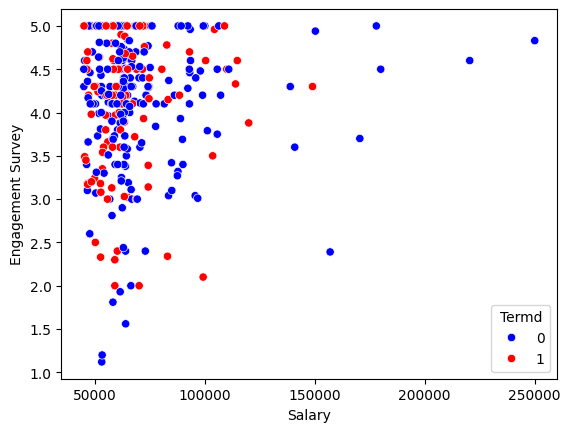

In [ ]:
#code here
#custom warna
custom_palette = {0: 'blue', 1: 'red'}

#setting grafik
sns.scatterplot(data=data, x='Salary', y='EngagementSurvey', hue='Termd', palette=custom_palette)

#mendefinisikan x dan y
plt.xlabel('Salary')
plt.ylabel('Engagement Survey')

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)

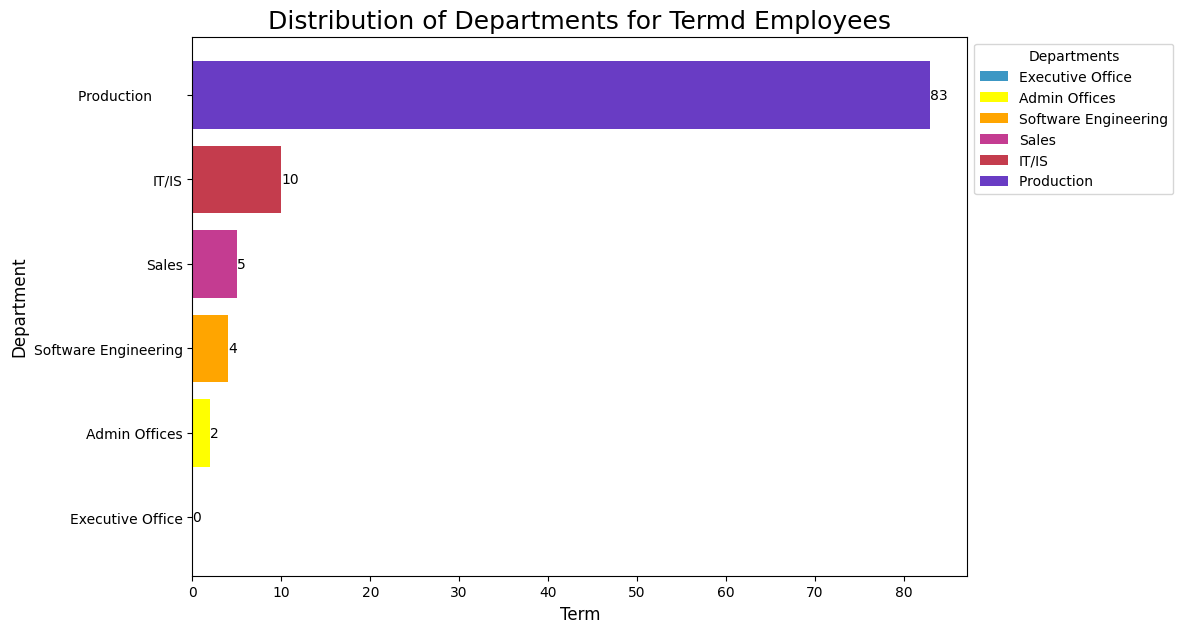

In [ ]:
terminasi = data.groupby(['Department']).Termd.agg('sum').to_frame('jumlah_terminasi').reset_index()
terminasi = terminasi.sort_values(by=['jumlah_terminasi'], ascending=True)

department = terminasi['Department']
jumlah_terminasi = terminasi['jumlah_terminasi']

colors = ['#3c97c4', 'yellow', 'orange', '#c43c91', '#c43c4d', '#693cc4']

# Figure Size
fig, ax = plt.subplots(figsize=(10, 7))

bars = plt.barh(department, jumlah_terminasi, color=colors)
plt.gca().bar_label(bars)

# Legend
plt.legend(bars, department, title='Departments', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Distribution of Departments for Termd Employees', fontsize=18)
plt.xlabel('Term', fontsize=12)
plt.ylabel('Department', fontsize=12)

# Show Plot
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)

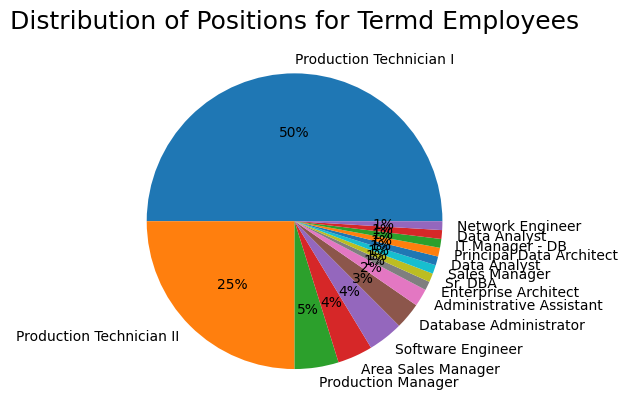

In [ ]:
data_pie = data[data['Termd'] == 1]
count = data_pie['Position'].value_counts()

# Create a pie chart
plt.pie(data_pie['Position'].value_counts(), labels=data_pie['Position'].value_counts().index, autopct='%.0f%%')

# Add title
plt.title('Distribution of Positions for Termd Employees', fontsize=18)

# Show the plot
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

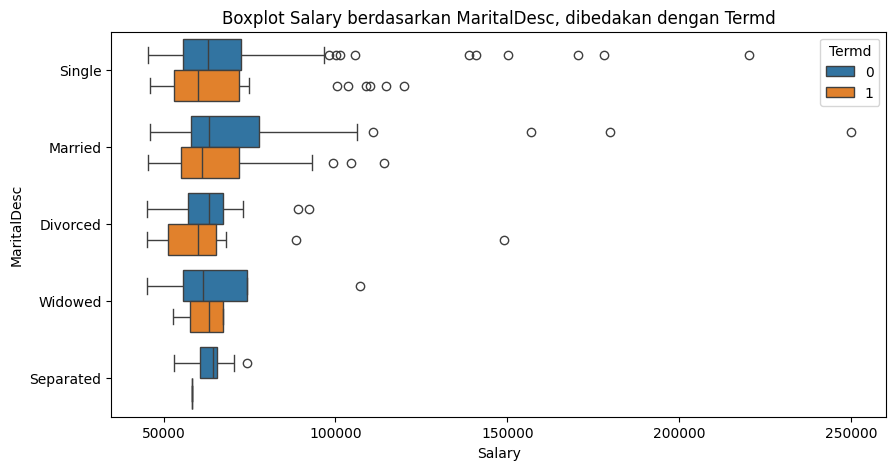

In [ ]:
# Membuat boxplot menggunakan seaborn
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data)
# Kita buat judul
plt.title('Boxplot Salary berdasarkan MaritalDesc, dibedakan dengan Termd')
# Menampilkan plot
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

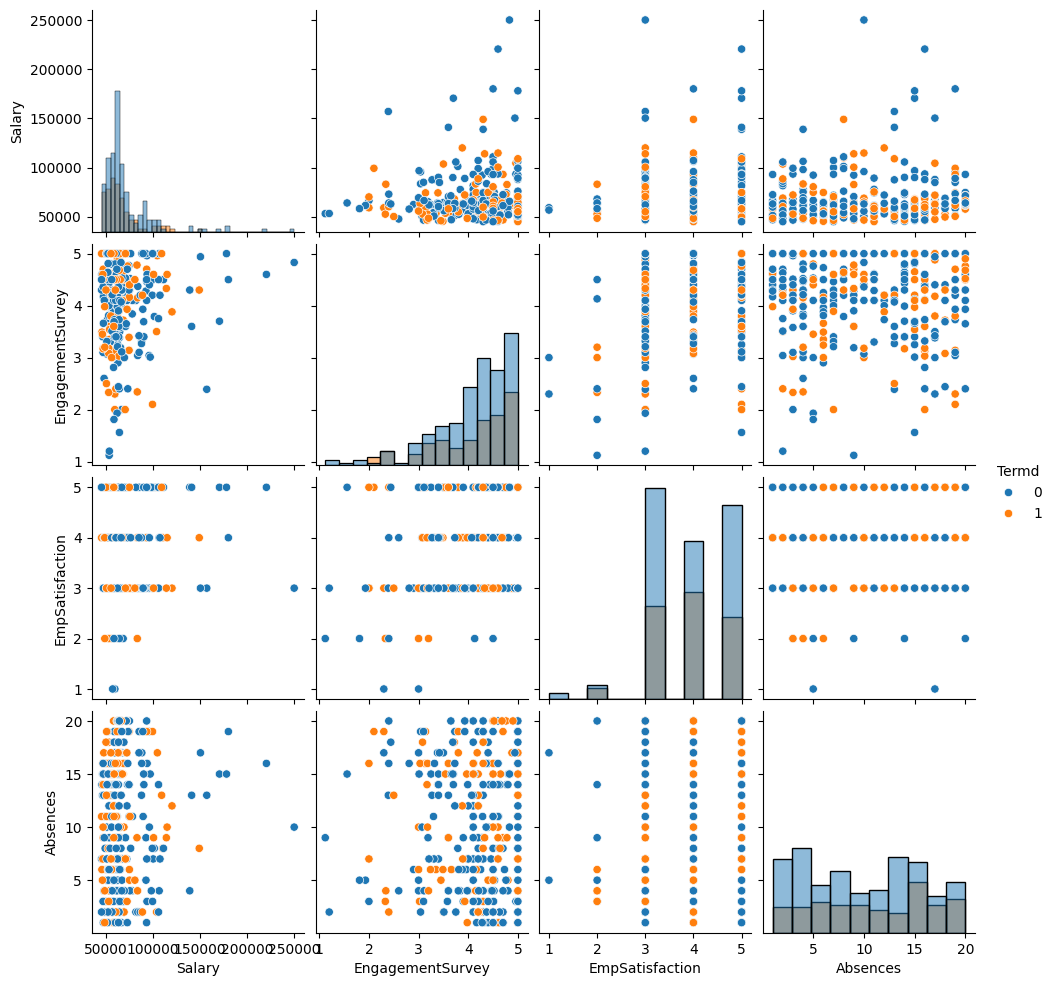

In [ ]:
#code here
# kita buat pairplot pakai seaborn
sns.pairplot(data, vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], hue='Termd', diag_kind='hist')
plt.show()

# Insight (Answering the Question)

11. Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>

In [ ]:
# Menghitung jumlah setiap kategori PerformanceScore untuk tiap ManagerName
performance_counts = data.groupby(['ManagerName', 'PerformanceScore']).size().unstack(fill_value=0).reset_index()
performance_counts.columns.name = None  # Menghilangkan nama kolom index

# Mengurutkan kolom berdasarkan kategori yang diinginkan
columns_order = ['ManagerName', 'Fully Meets', 'Needs Improvement', 'Exceeds', 'PIP']
performance_counts = performance_counts.reindex(columns=columns_order, fill_value=0)

# Menampilkan dataframe baru
performance_counts

,ManagerName,Fully Meets,Needs Improvement,Exceeds,PIP
0,Alex Sweetwater,6,1,2,0
1,Amy Dunn,15,1,3,2
2,Board of Directors,2,0,0,0
3,Brandon R. LeBlanc,7,0,0,0
4,Brannon Miller,10,1,7,4
5,Brian Champaigne,8,0,0,0
6,David Stanley,19,1,1,0
7,Debra Houlihan,2,1,0,0
8,Elijiah Gray,18,2,2,0
9,Eric Dougall,3,0,1,0


Berdasarkan data di atas dapat disimpulkan bahwa manajer tidak memiliki hubungan yang signifikan terhadap performa karyawan mereka.

Mayoritas karyawan dibawa kepemimpinan manajer manapun secara konsisten menunjukkan performa "fully meets" atau memenuhi ekspektasi kinerja, sehingga dapat dipastikan bahwa performa karyawan tidak banyak dipengaruhi oleh perbedaan dalam gaya atau pendekatan manajerial.

12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

In [ ]:
# Kelompokkan berdasarkan 'RecruitmentSource' dan hitung total rekrutmen dan terminasi
summary = data.groupby('RecruitmentSource').agg(
    total_recruited=('Termd', 'count'),
    total_terminated=('Termd', 'sum')
)

# Hitung rasio terminasi
summary['termination_ratio'] = summary['total_terminated'] / summary['total_recruited']

# Urutkan berdasarkan rasio terminasi terendah
best_sources = summary.sort_values('termination_ratio', ascending=True)

# Tampilkan hasil
best_sources

,total_recruited,total_terminated,termination_ratio
RecruitmentSource,,,
Website,13,1,0.076923
Employee Referral,31,5,0.161290
LinkedIn,76,18,0.236842
Indeed,87,21,0.241379
CareerBuilder,23,11,0.478261
Other,2,1,0.500000
Diversity Job Fair,29,16,0.551724
Google Search,49,30,0.612245
On-line Web application,1,1,1.000000


Berdasarkan data yang didapatkan sumber rekrutmen terbaik adalah dari Website dan Employee Referral. Dengan rasio terminasi yang rendah, karyawan yang direkrut dari kedua sumber ini lebih cenderung bertahan di perusahaan dibandingkan dengan sumber rekrutmen lainnya.